In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score
from pylab import rcParams
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from pylab import rcParams
import warnings
from pandas.core.nanops import nanmean as pd_nanmean
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%load_ext pycodestyle_magic

<br>
<br>
<br>
<br>
<br>

# 1

In [60]:
test = pd.read_excel('testing.xlsx', index_col='Date')
train = pd.read_excel('training.xlsx', index_col='Date')

Посмотрим на исходный ряд

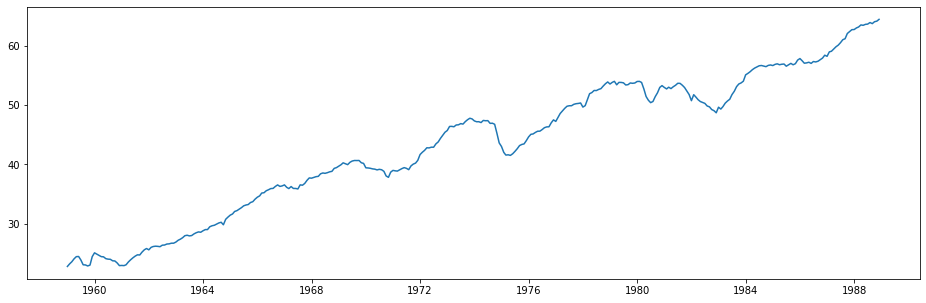

In [61]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=train.Value)
plt.show()

Теперь отобразим наш ряд и его скользящие средние

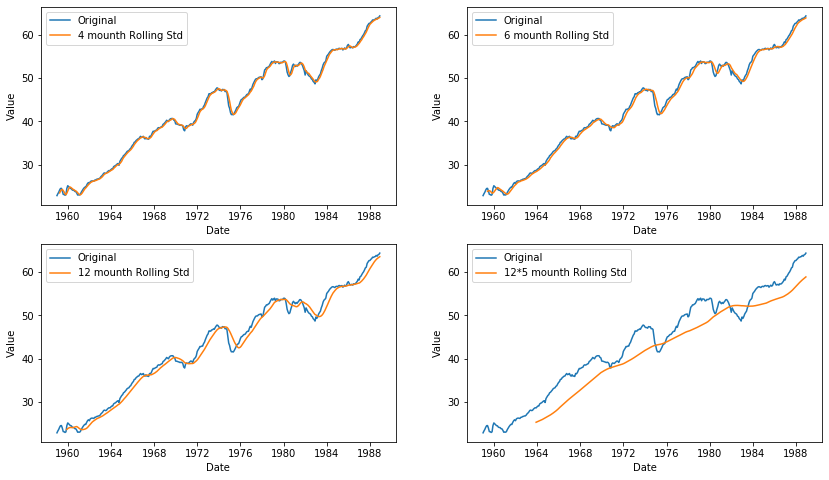

In [62]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

window = 4
sns.lineplot(x=train.index, y=train.Value, ax=axes[0][0],
             palette="Paired", label='Original')
sns.lineplot(x=train.index, y=train.Value.rolling(window=window).mean(),
             ax=axes[0][0], palette="Paired", label='4 mounth Rolling Std')

window = 6
sns.lineplot(train.index, train.Value, ax=axes[0][1],
             palette="Paired", label='Original')
sns.lineplot(train.index, train.Value.rolling(window=window).mean(),
             ax=axes[0][1], palette="Paired", label='6 mounth Rolling Std')

window = 12
sns.lineplot(train.index, train.Value, ax=axes[1][0],
             palette="Paired", label='Original')
sns.lineplot(train.index, train.Value.rolling(window=window).mean(),
             ax=axes[1][0], palette="Paired", label='12 mounth Rolling Std')

window = 12 * 5
sns.lineplot(train.index, train.Value, ax=axes[1][1],
             palette="Paired", label='Original')
sns.lineplot(train.index, train.Value.rolling(window=window).mean(),
             ax=axes[1][1], palette="Paired", label='12*5 mounth Rolling Std')
plt.show()

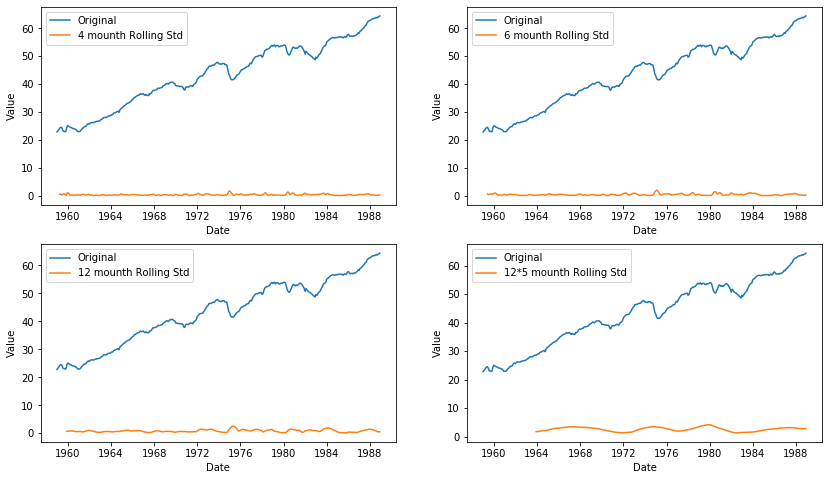

In [63]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

window = 4
sns.lineplot(x=train.index, y=train.Value, ax=axes[0][0],
             palette='Set3', label='Original')
sns.lineplot(x=train.index, y=train.Value.rolling(window=window).std(),
             ax=axes[0][0], palette='Set3', label='4 mounth Rolling Std')

window = 6
sns.lineplot(train.index, train.Value, ax=axes[0][1],
             palette='Set3', label='Original')
sns.lineplot(train.index, train.Value.rolling(window=window).std(),
             ax=axes[0][1], palette='Set3', label='6 mounth Rolling Std')

window = 12
sns.lineplot(train.index, train.Value, ax=axes[1][0],
             palette='Set3', label='Original')
sns.lineplot(train.index, train.Value.rolling(window=window).std(),
             ax=axes[1][0], palette='Set3', label='12 mounth Rolling Std')

window = 12 * 5
sns.lineplot(train.index, train.Value, ax=axes[1][1],
             palette='Set3', label='Original')
sns.lineplot(train.index, train.Value.rolling(window=window).std(),
             ax=axes[1][1], palette='Set3', label='12*5 mounth Rolling Std')

сезонность равна 12 месяцам

<br>
<br>
<br>
<br>
<br>

# 2

In [64]:
def my_seasonal_decompose(X, model, freq):
    MA0 = X.rolling(window=1).mean()
    MA = X.rolling(window=freq).mean()
    if model == 'additive':
        detrend_ = X - MA
    else:
        detrend_ = X / MA

    def seasonal_mean(x, period):
        """
        Return means for each period in x. period is an int that gives the
        number of periods per cycle. E.g., 12 for monthly. NaNs are ignored
        in the mean.
        """
        return np.array([pd_nanmean(x[i::period],
                        axis=0) for i in range(period)])
    s_a = seasonal_mean(detrend_, freq)
    if model == 'additive':
        s_a -= np.mean(s_a, axis=0)
    nobs = detrend_.shape[0]
    seasonal = np.tile(s_a.T, nobs // freq + 1).T[:nobs]
    if model == 'additive':
        residuals = X - MA - seasonal
    else:
        residuals = (X / MA) / seasonal
    return MA0, MA, seasonal, residuals

Аддитивная модель

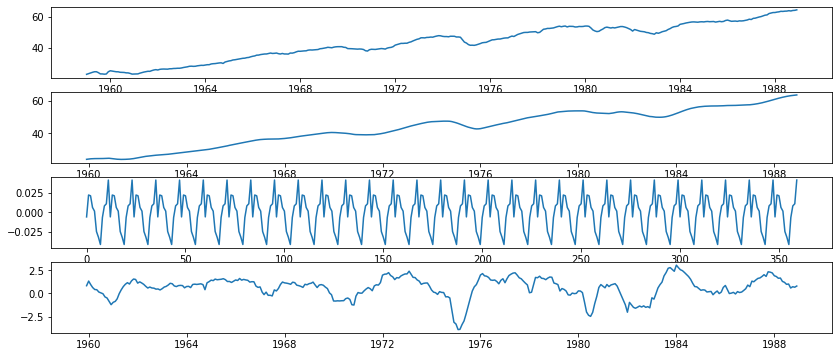

In [65]:
fig, axes = plt.subplots(4, 1, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(6)
result = my_seasonal_decompose(train.Value, model='additive', freq=12)
sns.lineplot(data=result[0], ax=axes[0])
sns.lineplot(data=result[1], ax=axes[1])
sns.lineplot(data=result[2], ax=axes[2])
sns.lineplot(data=result[3], ax=axes[3])


1.Тренд

Матожидание тренда меняется со временем, следовательно тренд не стационарен.


2.Сезонность

Text(0.5, 1.0, 'Rolling Std')

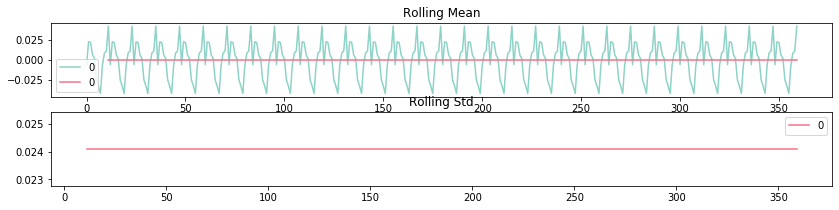

In [66]:
fig, axes = plt.subplots(2, 1, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(3)
sns.lineplot(data=pd.DataFrame(result[2]), ax=axes[0],
             palette='Set3')
sns.lineplot(data=pd.DataFrame(result[2]).rolling(window=12).mean(),
             ax=axes[0], palette='husl').set_title('Rolling Mean')
sns.lineplot(data=pd.DataFrame(result[2]).rolling(window=12).std(),
             ax=axes[1], palette='husl').set_title('Rolling Std')

Матожидание и дисперсия сезонности не зависят от времени, следовательно сезонность стационарна

3.Остатки

Text(0.5, 1.0, 'Rolling Std')

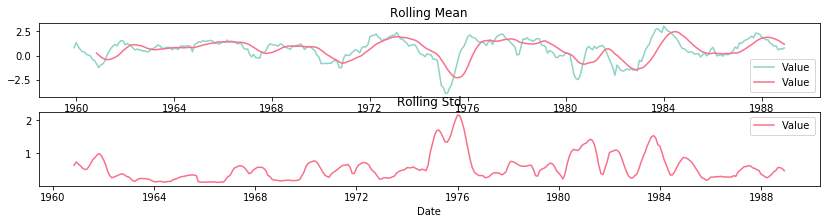

In [67]:
fig, axes = plt.subplots(2, 1, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(3)
sns.lineplot(data=pd.DataFrame(result[3]), ax=axes[0],
             palette='Set3')
sns.lineplot(data=pd.DataFrame(result[3]).rolling(window=12).mean(),
             ax=axes[0], palette='husl').set_title('Rolling Mean')
sns.lineplot(data=pd.DataFrame(result[3]).rolling(window=12).std(),
             ax=axes[1], palette='husl').set_title('Rolling Std')

Матожидание и дисперсия остатков не зависят от времени, следовательно остатки стационарны

Мультипликативная модель

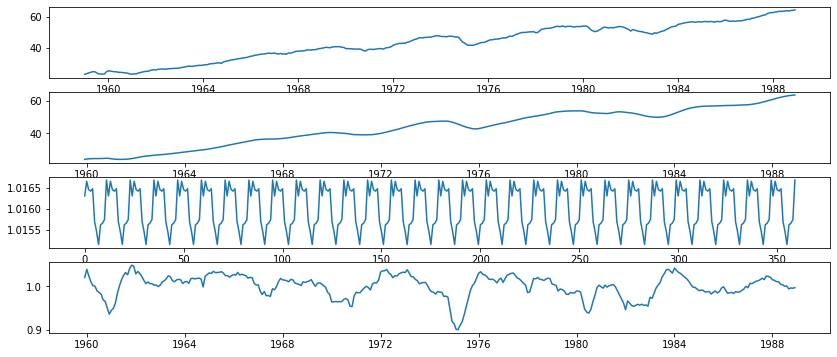

In [68]:
fig, axes = plt.subplots(4, 1, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(6)
result = my_seasonal_decompose(train.Value, model='m', freq=12)
sns.lineplot(data=result[0], ax=axes[0])
sns.lineplot(data=result[1], ax=axes[1])
sns.lineplot(data=result[2], ax=axes[2])
sns.lineplot(data=result[3], ax=axes[3])
plt.show()

1.Тренд

Матожидание тренда меняется со временем, следовательно тренд не стационарен.


2.Сезонность

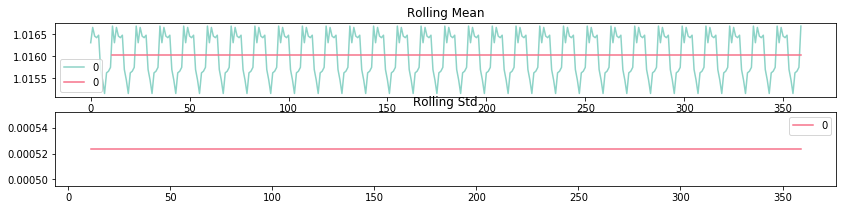

In [69]:
fig, axes = plt.subplots(2, 1, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(3)
sns.lineplot(data=pd.DataFrame(result[2]), ax=axes[0],
             palette='Set3')
# sns.set_palette("husl")
sns.lineplot(data=pd.DataFrame(result[2]).rolling(window=12).mean(),
             ax=axes[0], palette='husl').set_title('Rolling Mean')
sns.lineplot(data=pd.DataFrame(result[2]).rolling(window=12).std(),
             ax=axes[1], palette='husl').set_title('Rolling Std')
plt.show()

Матожидание и дисперсия сезонности не зависят от времени, следовательно сезонность стационарна

3.Остатки

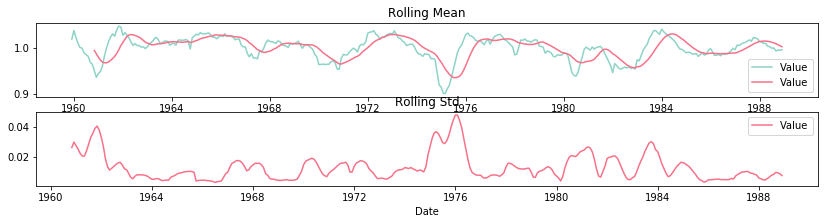

In [70]:
fig, axes = plt.subplots(2, 1, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(3)
sns.lineplot(data=pd.DataFrame(result[3]), ax=axes[0],
             palette='Set3')
sns.lineplot(data=pd.DataFrame(result[3]).rolling(window=12).mean(),
             ax=axes[0], palette='husl').set_title('Rolling Mean')
sns.lineplot(data=pd.DataFrame(result[3]).rolling(window=12).std(),
             ax=axes[1], palette='husl').set_title('Rolling Std')
plt.show()

Матожидание и дисперсия остатков не зависят от времени, следовательно остатки стационарны

<br>
<br>
<br>
<br>
<br>

# 3

Выясним порядок интегрированности нашего ряда, начнем с дифференцирования первого порядка.

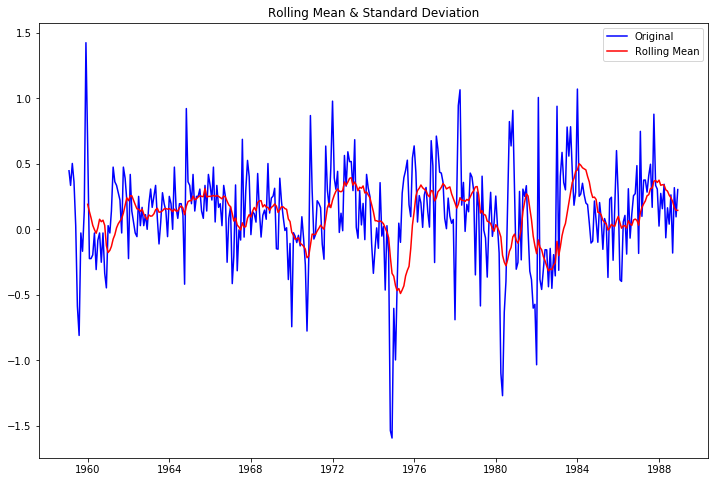

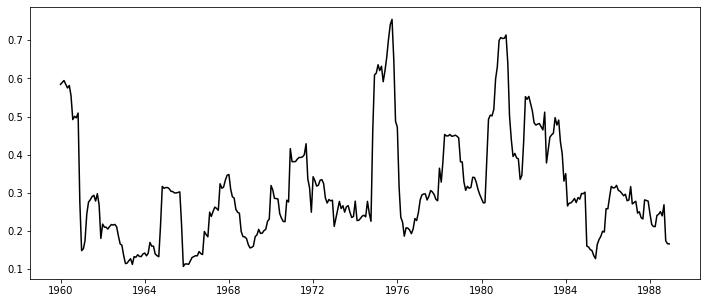

In [71]:
rcParams['figure.figsize'] = 12, 5
sample = train.Value - train.Value.shift(1)
sample.dropna(inplace=True)
# test_stationarity(sample_data_diff, window = 48)
# Determing rolling statistics
timeseries = sample
rolmean = timeseries.rolling(12).mean()
rolstd = timeseries.rolling(12).std()

# Plot rolling statistics:
fig = plt.figure(figsize=(12, 8))
orig = plt.plot(timeseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()
std = plt.plot(rolstd, color='black', label='Rolling Std')

plt.show()

Итак, мы получили, что первые разности ряда стационарны, значит он является интегрируемым рядом первого порядка.(k=1)

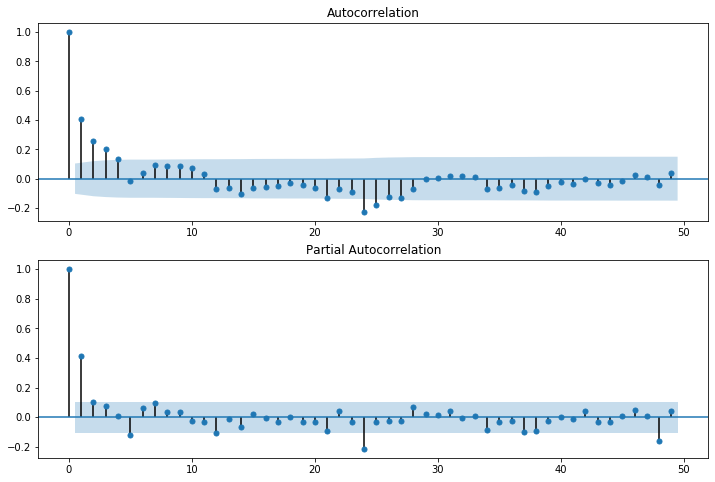

In [72]:
# построим автокорреляцию и частичную автокорреляцию ряда
traindiff = train.Value.diff(periods=1).dropna()
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(traindiff.values.squeeze(), lags=49, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(traindiff, lags=49, ax=ax2)


In [73]:
def arima_call(train, order, test):
    model = sm.tsa.ARIMA(train.Value.squeeze(), order=order, freq='MS').fit()
    y_r = model.predict(start=train.shape[0],
                        end=train.shape[0]+test.shape[0]-1, typ='levels')
    plt.figure(figsize=(15, 8))
    plt.plot(train.Value, label='Train')
    plt.plot(test.Value, label='Test')
    plt.plot(y_r, label='ARIMA')
    plt.legend(loc='best')
    print('Score: {}'.format(r2_score(test.Value, y_r)))
    print('Aiс: {}'.format(model.aic))
    plt.show()
    return model.aic

score: -3.320676227485367
aik: 251.08321143936996


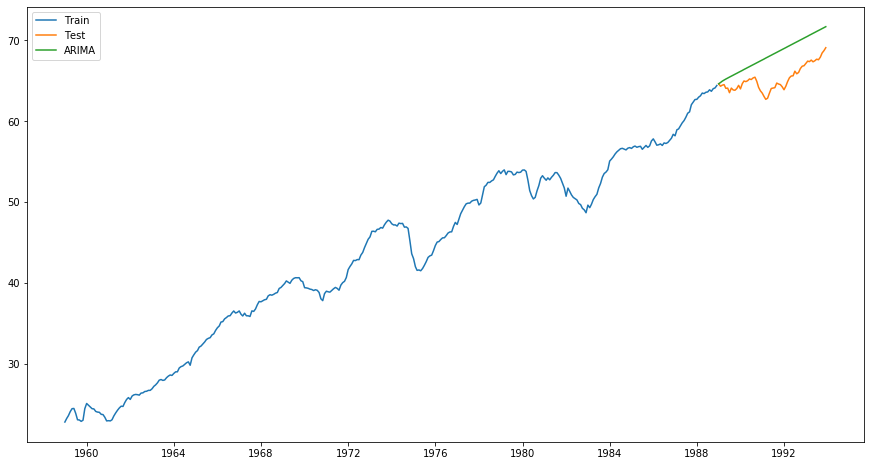

251.08321143936996

In [74]:
arima_call(train, (1, 1, 3), test)

score: -3.281337599736898
aik: 248.73365724475002


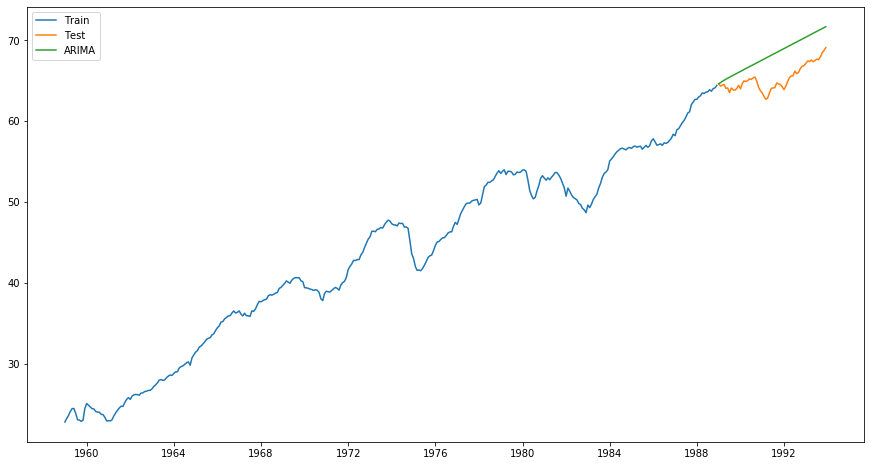

248.73365724475002

In [57]:
# оптимальная по aic с учетом ограничений q + p <= 2
arima_call(train, (1, 1, 1), test)

ACF экспоненциально затухает, начиная с первого лага, причем затухание может носить монотонный или колебательный характер. PACF затухает экспоненциально, монотонно или колебательно.

score: -4.01917724226417
aik: 241.22248892236553


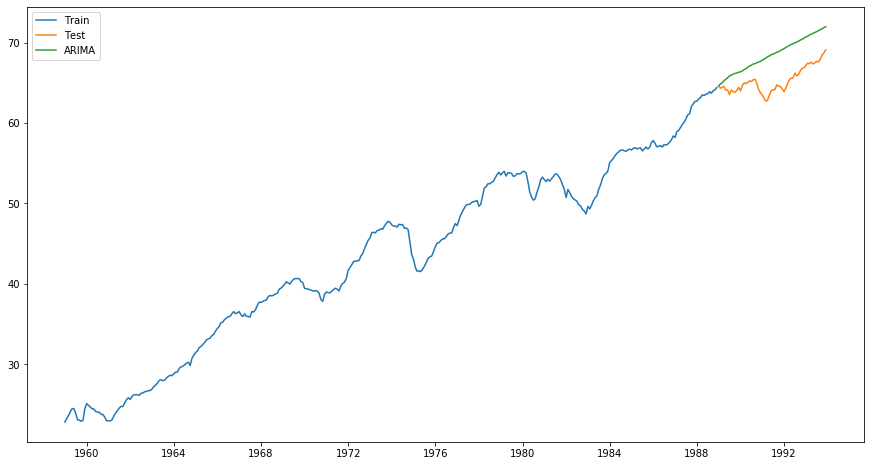

241.22248892236553

In [58]:
# оптимальная по aic без ограничений на параметры
arima_call(train, (9, 1, 4), test)

C:\Users\shumi\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


score: 0.007869432685192024
aik: 248.80203851097747


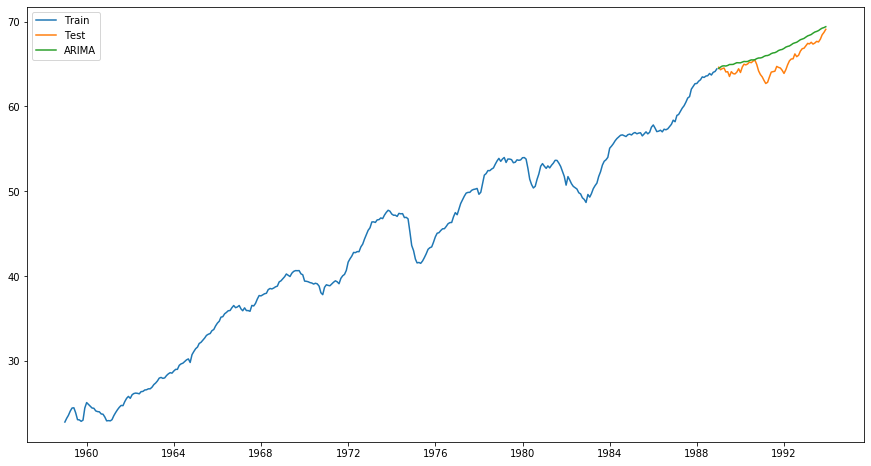

248.80203851097747

In [59]:
# визуально подходящая
arima_call(train, (12, 1, 3), test)

score: -2.6828269787277628
aik: 315.9856306740645


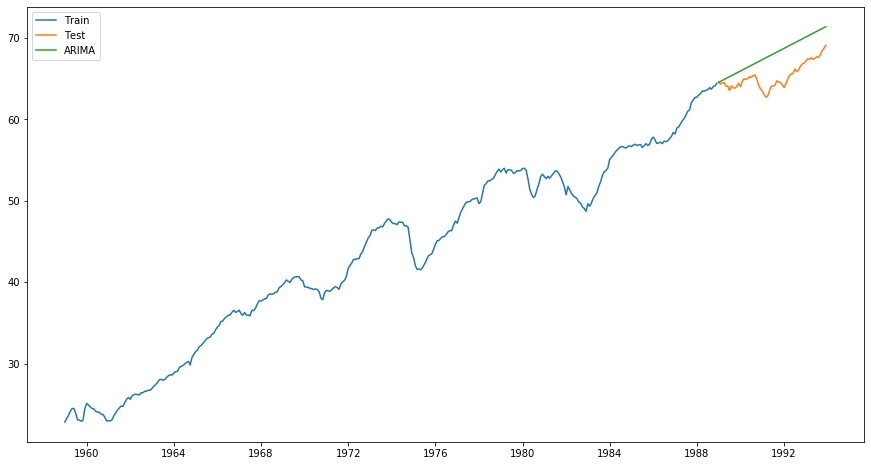

[315.9856306740645, 0, 1, 0]
score: -2.8930724092050157
aik: 267.4502825675743


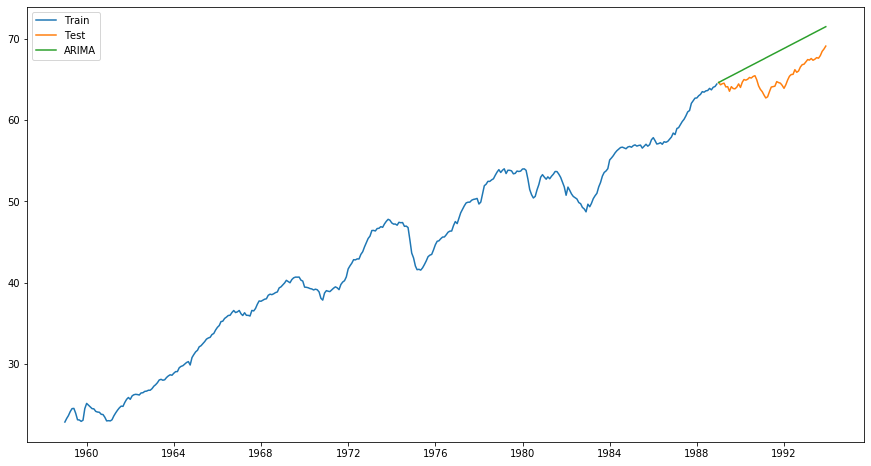

[267.4502825675743, 0, 1, 1]
score: -3.062320298044888
aik: 251.9826620221918


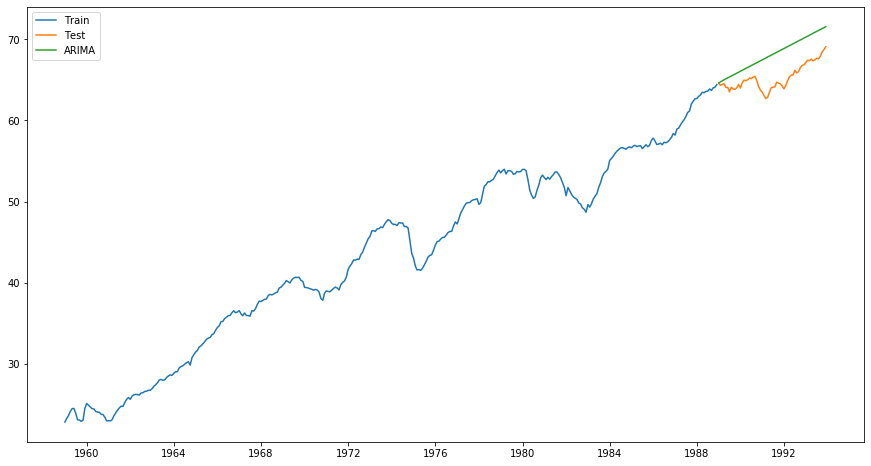

[251.9826620221918, 1, 1, 0]
score: -3.281337599736898
aik: 248.73365724475002


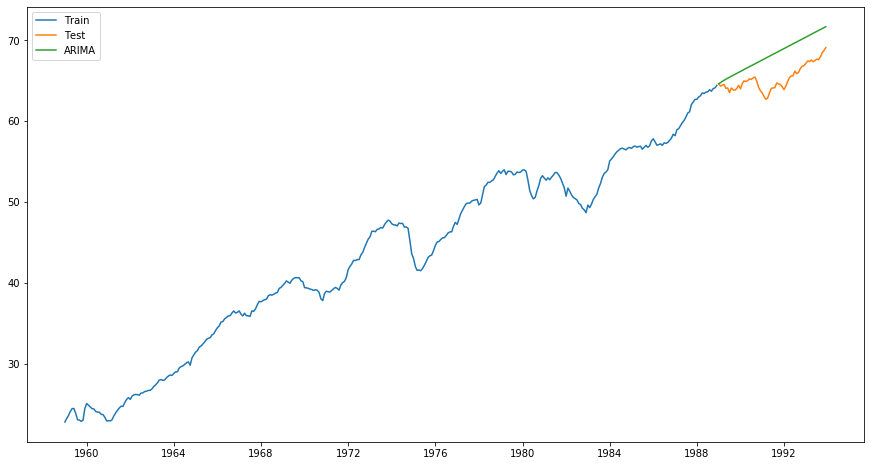

[248.73365724475002, 1, 1, 1]
Final: [248.73365724475002, 1, 1, 1]


In [30]:
t = [1000, 0, 1, 0]
p = 0
for a in range(0, 12):
    for b in range(0, 12):
        try:
            d = arima_call(train, (a, 1, b), test)
        except:
            continue
        if d < t[0]:
            t[0] = d
            t[1] = a
            t[3] = b
            print(t)
print("Final:", t)